<a href="https://colab.research.google.com/github/cmatheusIA/Ds_estudos/blob/master/e_commerce_projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto:
Fomos contratados por uma rede de loja virtuais para investigar sua base de dados retirar insight e resolver o maximo de problemas possiveis, com isso vamos utilizar uma base de dados de kaggle [ecommerce-data](https://www.kaggle.com/datasets/carrie1/ecommerce-data), a qual iremos trabalhar nela.

# Dicionario de dados :



*   InvoiceNo -> Numero da venda
*   StockCode -> codigo do produto
*   Description -> Descrição do produto
*   Quantity -> Quantidade do produto
*   InvoiceDate -> Data da venda
*   UnitPrice -> Preço por unidade.
*   CustomerID -> ID do consumidor
*   Country -> Pais da compra



# imports e paths

In [ ]:
import pandas as pd
import numpy as np
import seaborn as  sns
import plotly.express as px
import matplotlib.pyplot as plt
from math import sqrt
import plotly.graph_objects as go
import datetime as dt
import plotly.colors as plc

In [ ]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [16, 10]   ##
#plt.rcParams['figure.dpi'] = 100          ## 
plt.rc('font', size=10)                    ## 
plt.rc('axes', titlesize=14)               ## 
plt.rc('axes', labelsize=14)               ##
plt.rc('xtick', labelsize=10)              ##
plt.rc('ytick', labelsize=10)              ##
plt.rc('legend', fontsize=10)              ##
plt.rc('figure', titlesize=12)             ## 
#############################################

In [ ]:
path = "/content/drive/MyDrive/stack_teste/data.csv"



---

# Análises

---



In [ ]:
data = pd.read_csv(path,encoding= 'unicode_escape')

In [ ]:
display(data.head())

## Conhecendo o dataset

---



---



1. Qual o tamanho dos nossos dados?

In [ ]:
print("O dataset possui linhas-> {}, colunas-> {}".format(data.shape[0],data.shape[1]))

2. Existem dados nulos?

In [ ]:
nulos_percent = data.isnull().sum() / data.shape[0] * 100
nulos_percent
print("Dados nulos :")
display(nulos_percent)

Aqui vemos uma alta porcentagem de dados nulos na Coluna CustomerID algo em torno de 25% e uma pequena quantidade na coluna de Description.

In [ ]:
data["InvoiceDate"]=pd.to_datetime(data.InvoiceDate, cache=True)

In [ ]:
data["TotalPrice"] = data.Quantity * data.UnitPrice

### Investigando os dados nulos do nosso dataset

---



---



#### CustomerID

In [ ]:
missing_data  = data[data.CustomerID.isnull()]
display(missing_data)

In [ ]:
missing_data.StockCode.value_counts()[:10]

In [ ]:
missing_data_per_StockCode = pd.DataFrame(missing_data.StockCode.value_counts()).reset_index().rename(columns={
    "index":"codigo_produto",
    "StockCode": "missing_CustomerID"
})

In [ ]:
fig = px.bar(missing_data_per_StockCode[:10], x="codigo_produto", y="missing_CustomerID",
             title='10 maiores indices de CustomerID missing por codigo do produto')
fig.show()

DOT é visto como o maior produto que possui numero de cliente nulos, na descrição é apresentado o o termo DOTCOMPOSTAGE que aparenta ser uma sigla com : <br/>
      **DOTCOM**  é um termo que se refere geralmente a empresas ou sites da internet que fazem parte da era da "bolha da internet" do final dos anos 90 e início dos anos 2000. A "era dotcom" foi caracterizada pelo surgimento de muitas empresas de tecnologia da informação que ofereciam serviços ou produtos on-line, como lojas virtuais, provedores de acesso à internet e portais de notícias.

**POSTAGE** é um termo que se refere à taxa ou custo envolvido na entrega de correio ou envio de objetos pelo correio. Isso pode incluir custos de envio de cartas, pacotes, remessas expressas, etc. Dependendo do país ou região, os valores de postage podem variar, levando em consideração o peso, tamanho e destino dos objetos que serão enviados. Algumas empresas oferecem serviços de envio com preços mais baixos, enquanto outras cobram taxas mais elevadas por entregas expressas ou internacionais. A idéia de postage é cobrar o suficiente para cobrir os custos de transporte e manuseio dos objetos enviados.

In [ ]:
missing_data[missing_data["StockCode"]=='85099B'].head(1)

O segundo produto com maior indice de dados nulos na coluna numero de clientes
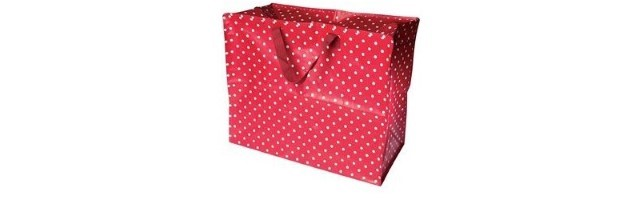

In [ ]:
missing_data[missing_data["StockCode"]=='21931'].head(1)

#### Dados nulos description x customerid

In [ ]:
description_null = data[data.Description.isnull()]

In [ ]:
description_null

In [ ]:
missing_data[missing_data.Description.isnull()].StockCode  == description_null.StockCode

Logo podemos perceber que os dados com descrição nula está contido nos dados com CustomerID nulo, assim que os 2 casos fazem parte da mesma problematica, que seria algum erro de digitação, podemos investigar se as vendas foram canceladas.

In [ ]:
missing_data['cancelados'] = missing_data.InvoiceNo.apply(lambda x: "C" in str(x))

In [ ]:
missing_data

In [ ]:
missing_data[missing_data["cancelados"]==True].isnull().sum()/missing_data.shape[0]

Assim podemos descartar a ideia de que as dados nulos estavam ligados diretamente as vendas canceladas. O que podemos dizer que a razão desses dados estarem nulos pode ser provavelmente error de digitação ou error na leitura do banco de dados.

### Verificando vendas

---



---



#### canceladas

A coluna invoiceno representa o numero da venda  caso uma venda seja cancelada a mesma teria que receber uma letra C no seu numero

In [ ]:
df = data.copy()
df['cancelados'] = df.InvoiceNo.apply(lambda x: "C" in str(x))
vendas_canceladas = df[df['cancelados'] == True]
vendas_canceladas.head()

In [ ]:
vendas_canceladas["TotalPrice"] = vendas_canceladas.Quantity * vendas_canceladas.UnitPrice

In [ ]:
print("Quantidade de vendas canceladas gira em torno de {}".format(vendas_canceladas.shape[0]))

In [ ]:
print("Preço medio das vendas canceladas {}".format(round(vendas_canceladas.TotalPrice.mean()*-1,3)))

In [ ]:
vendas_canceladas_stock_code = pd.DataFrame(vendas_canceladas.StockCode.value_counts()).reset_index().rename(columns={
    "index":"codigo_produto",
    "StockCode": "produtos cancelados"
})

In [ ]:
fig = px.bar(vendas_canceladas_stock_code[:10], x="produtos cancelados", y="codigo_produto",
             title='Quantidade de produtos cancelados.')
fig.show()

In [ ]:
contagem_cancelamentos_pais = pd.DataFrame(vendas_canceladas.Country.value_counts()).reset_index().rename(columns={
    "index":"paises",
    "Country": "cancelamentos"
})

In [ ]:
fig = px.bar(contagem_cancelamentos_pais[:10], x="cancelamentos", y="paises", orientation='h',
             title='Paises com maiores indices de cancelamentos de vendas')
fig.show()

In [ ]:
vendas_canceladas.Quantity.plot(kind="kde")

In [ ]:
vendas_canceladas.Quantity.plot()

###### Trabalhando com datas


In [ ]:
vendas_canceladas["data"]= vendas_canceladas.InvoiceDate.dt.date
vendas_canceladas["dia"]= vendas_canceladas.InvoiceDate.dt.day
vendas_canceladas["mes"]= vendas_canceladas.InvoiceDate.dt.month
vendas_canceladas["ano"]= vendas_canceladas.InvoiceDate.dt.year
vendas_canceladas["hora"]=vendas_canceladas.InvoiceDate.dt.hour

**Plot vendas canceladas por data, hora**

In [ ]:
num_transacoes_por_hora = vendas_canceladas.groupby('hora')['InvoiceNo'].nunique()
num_ganhos_por_hora = vendas_canceladas.groupby('hora')['TotalPrice'].sum()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.barplot(x=num_transacoes_por_hora.index, y=num_transacoes_por_hora.values, ax=ax1)
sns.lineplot(x=num_ganhos_por_hora.index, y=num_ganhos_por_hora.values, ax=ax2)
ax2.set_title("Ganhos perdidos por hora")
ax1.set_title("Vendas canceladas por hora")
plt.show()

In [ ]:
num_transacoes_por_dia = vendas_canceladas.groupby('dia')['InvoiceNo'].nunique()
num_ganhos_por_dia = vendas_canceladas.groupby('dia')['TotalPrice'].sum()

fig, (ax1, ax2) = plt.subplots(1, 2)
sns.barplot(x=num_transacoes_por_dia.index, y=num_transacoes_por_dia.values, ax=ax1)
sns.lineplot(x=num_ganhos_por_dia.index, y=num_ganhos_por_dia.values, ax=ax2)
ax2.set_title("Ganhos perdidos por dia")
ax1.set_title("Vendas canceladas por dia")
plt.show()

In [ ]:
num_transacoes_por_mes = vendas_canceladas.groupby('mes')['InvoiceNo'].nunique()
num_ganhos_por_mes = vendas_canceladas.groupby('mes')['TotalPrice'].sum()

fig, (ax1, ax2) = plt.subplots(1, 2)
sns.barplot(x=num_transacoes_por_mes.index, y=num_transacoes_por_mes.values, ax=ax1)
sns.lineplot(x=num_ganhos_por_mes.index, y=num_ganhos_por_mes.values, ax=ax2)
ax2.set_title("Ganhos perdidos por mes")
ax1.set_title("Vendas canceladas por mes")
plt.show()

In [ ]:
num_transacoes_por_ano = vendas_canceladas.groupby('ano')['InvoiceNo'].nunique()
num_ganhos_por_ano = vendas_canceladas.groupby('ano')['TotalPrice'].sum()

fig, (ax1, ax2) = plt.subplots(1, 2)
sns.barplot(x=num_transacoes_por_ano.index, y=num_transacoes_por_ano.values, ax=ax1)
sns.lineplot(x=num_ganhos_por_ano.index, y=num_ganhos_por_ano.values, ax=ax2)
ax2.set_title("Ganhos perdidos por ano")
ax1.set_title("Vendas canceladas por ano")
plt.show()

Assim os gráficos mostram que durante o dia o período que mais possue cancelamentos é das 10 horas as 16 horas, durante o mes não tem um periodo bem especificado como das horas , mas os dias 6,9,14,18 apresentam altos indices de cancelamentos, já com relação ao meses os maiores numeros de cancelamentos são oriundos dos meses 10, 11, 12, e no perido anual em 2011 tivemos mais cancelamentos uma diferença de 3000 comparada com 2010.

Assim podemos notar que as vendas canceladas possuem sua quantidade negativada, ou seja, todos os dados da coluna Quantity estão abaixo de 0 ou são iguais a 0

#### Não canceladas

In [ ]:
# primeiro passo para selecionar as vendas não canceladas seria o de retirar os dados que estão com a quantitidade negativada

data_prep1 = data[data.Quantity>0]

In [ ]:
display(data_prep1)

Com os dados sem cancelamentos podemos identificar algumas informações : 

*   Paises com os maiores indices de vendas
*   Criação da coluna Total_price



Paises com os maiores indices de vendas


In [ ]:
paises = data_prep1['Country'].value_counts(normalize=True)
paises[:5]

In [ ]:
vendas_por_paises= pd.DataFrame(paises.head(15)).reset_index().rename(columns={
    "index":"paises",
    "Country": "numero_de_vendas"
})

In [ ]:
fig = px.bar(vendas_por_paises, x="numero_de_vendas", y="paises", orientation='h',
             title='Os 15 paises com maiores indices de vendas')
fig.show()

Logo podemos ver que UK é o pais onde os números de vendas são desparados, ficando proporcional o número de cancelamentos do pais.

In [ ]:
data_prep1.isnull().sum()

In [ ]:
data_prep1.dropna(inplace=True)

In [ ]:
data_prep1["TotalPrice"] = data_prep1["Quantity"] * data_prep1["UnitPrice"]

In [ ]:
mean_price_by_country = data_prep1.groupby('Country')['TotalPrice'].mean()
mean_quantity_by_country = data_prep1.groupby('Country')['Quantity'].mean()


sns.lineplot(x=mean_price_by_country.index, y=mean_price_by_country.values, label='Transaction Value')
sns.lineplot(x=mean_quantity_by_country.index, y=mean_quantity_by_country.values, label='Transaction Quantity')
plt.title("Media valores e quantidade por transação")
plt.xlabel('Pais')
plt.ylabel('Media de valores e quantidade')
plt.show()

In [ ]:
sns.barplot(x=mean_price_by_country.values, y=mean_price_by_country.index, label='Price',orient="h")
plt.title("Media valores por transação")
plt.xlabel('Pais')
plt.ylabel('Media de valores')
plt.show()

In [ ]:
sns.barplot(x=mean_quantity_by_country.values, y=mean_quantity_by_country.index, label='Quantity',orient="h")
plt.title("Media quantidade por transação")
plt.xlabel('Pais')
plt.ylabel('Media de quantidade')
plt.show()

In [ ]:
product_sales_by_country = data_prep1.groupby(['Description', 'Country'])['TotalPrice'].sum()
print(product_sales_by_country.sort_values(ascending=False).head(10))

In [ ]:
preco_por_produto= pd.DataFrame(product_sales_by_country.sort_values(ascending=False).head(20)).reset_index().rename(columns={
    "Description":"Description",
    "Country": "Country"
})

In [ ]:
preco_por_produto

In [ ]:
fig = px.bar(preco_por_produto, x="TotalPrice", y="Description", orientation='h',color="Description",
             title='Os 15 produtos mais vendidos')
fig.show()

#### Cohort


---


Cohort é um termo que pode ser utilizado em diversas áreas, mas em geral se refere a um grupo de indivíduos que compartilham uma ou mais características em comum e são observados ao longo do tempo.

Na área de estudos de mercado e análise de dados, cohort é frequentemente utilizado para se referir a um grupo de usuários ou clientes que compartilham uma característica ou comportamento em comum, como a data de registro em um serviço, o produto que compraram ou o canal de aquisição. A análise de cohorts permite identificar tendências ao longo do tempo, como a retenção de clientes ou a eficácia de campanhas de marketing.

In [ ]:
data.info()

In [ ]:
def get_Month(x):
    return dt.datetime(x.year,x.month,1)

In [ ]:
data.info()

In [ ]:
data["invoiceMounth"] = data["InvoiceDate"].apply(get_Month)

In [ ]:
data

In [ ]:
group = data.groupby("CustomerID")["invoiceMounth"]

In [ ]:
group.head()

In [ ]:
data["cohort_month"] = group.transform("min")

In [ ]:
data.head()

In [ ]:
# função para extração de data
def get_data_int(df,column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day

    return year,month,day

In [ ]:
invoice_year, invoice_month,_ = get_data_int(data,"invoiceMounth")
cohort_year, cohort_month,_ = get_data_int(data,"cohort_month")

In [ ]:
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month


data["cohort_index"] = years_diff * 12 +months_diff+1

In [ ]:
data.head()

In [ ]:
group_cohort = data.groupby(["cohort_month","cohort_index"])

In [ ]:
cohort_data = group_cohort["CustomerID"].apply(pd.Series.nunique)

In [ ]:
cohort_data

In [ ]:
cohort_data = cohort_data.reset_index()

In [ ]:
cohort_counts = cohort_data.pivot(index = "cohort_month",
                                columns = "cohort_index",
                                values = "CustomerID")

In [ ]:
cohort_counts

calculando a taxa de retenção

In [ ]:
# guardando a primeira linha
cohort_size = cohort_counts.iloc[:,0]

In [ ]:
#Divide todos os valores pelo cohort_size
retencao = cohort_counts.divide(cohort_size,axis=0)

In [ ]:
#Recria a tabela
retencao.round(4)*100

Heatmap com a nossa retenção

In [ ]:
fig = px.imshow(retencao.round(2), text_auto=True, aspect="auto")
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0.8)',  # Configurando cor de fundo com transparência
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Configurando cor do papel para transparente
    font=dict(color='white'),
    title= "Cohort retorno de clientes"
)
fig.show()

Cohort de media de vendas


In [ ]:
data.head(1)

In [ ]:
cohort_data2 = data.groupby(['cohort_month', 'cohort_index'])['Quantity'].mean().reset_index()
media_qtd  = cohort_data2.pivot_table(index = 'cohort_month',
                                            columns = 'cohort_index',
                                       values = 'Quantity').round(1)
media_qtd

In [ ]:
fig = px.imshow(media_qtd.round(1), text_auto=True, aspect="auto")
fig.update_layout(
    plot_bgcolor='ghostwhite',  
    paper_bgcolor='ghostwhite', 
    title= "Cohort da media da quantidade de produtos vendidos"
)
fig.show()

Cohort de media de ganhos

In [ ]:
cohort_data3 = data.groupby(['cohort_month', 'cohort_index'])['TotalPrice'].mean().reset_index()
average_sales  = cohort_data3.pivot_table(index = 'cohort_month',
                                           columns = 'cohort_index',
                                      values = 'TotalPrice').round(1)
average_sales

In [ ]:
fig = px.imshow(average_sales.round(2), text_auto=True, aspect="auto")
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0.5)',  # Configurando cor de fundo com transparência
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Configurando cor do papel para transparente
    font=dict(color='white'),
    title= "Cohort media de ganhos"
)
fig.show()

### Análise das descrições

---



---



---



### Verificando colunas numericas

---



---



In [ ]:
data_prep1.info()

In [ ]:
numeric_data = data_prep1[["TotalPrice","CustomerID","UnitPrice","Quantity"]]

In [ ]:
numeric_data.hist()
plt.show()

In [ ]:
numeric_data.plot(kind="box");

In [ ]:
numeric_data.describe()

Dados numero coo por exemplot CustomerID é apenas uma id para os consumidores

### Trabalhando com a coluna data

---



---







In [ ]:
data_prep1["InvoiceDate"] = pd.to_datetime(data_prep1.InvoiceDate, cache=True)

In [ ]:
print("Inicio : {}".format(data_prep1.InvoiceDate.min()))
print("Final : {}".format(data_prep1.InvoiceDate.max()))
print("Periodo : {}".format(data_prep1.InvoiceDate.max() - data_prep1.InvoiceDate.min()))

In [ ]:
data_prep1["data"]= data_prep1.InvoiceDate.dt.date
data_prep1["dia"]= data_prep1.InvoiceDate.dt.day
data_prep1["mes"]= data_prep1.InvoiceDate.dt.month
data_prep1["ano"]= data_prep1.InvoiceDate.dt.year

In [ ]:
data_prep1.head()

In [ ]:
produto_por_data = data_prep1.groupby(["Description","data"])["TotalPrice"].sum()

In [ ]:
produto_por_data

In [ ]:
top_products = produto_por_data.sort_values(ascending=False).head(10)
print(top_products)

In [ ]:
top_products.plot(kind='barh')
plt.title("Top produtos vendidos por data")
plt.xlabel("Total Price")
plt.show()

In [ ]:
df_clean_copy = data_prep1.copy()

In [ ]:
df_clean_copy["hora"]=data_prep1.InvoiceDate.dt.hour

In [ ]:
df_clean_copy

#### Vendas e ganhos por hora

In [ ]:
num_transacoes_por_hora = df_clean_copy.groupby('hora')['InvoiceNo'].nunique()
num_ganhos_por_hora = df_clean_copy.groupby('hora')['TotalPrice'].sum()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.barplot(x=num_transacoes_por_hora.index, y=num_transacoes_por_hora.values, ax=ax1)
sns.lineplot(x=num_ganhos_por_hora.index, y=num_ganhos_por_hora.values, ax=ax2)
ax2.set_title("Ganhos por hora")
ax1.set_title("Vendas por hora")
plt.show()

#### Vendas e ganhos por dia

In [ ]:
num_transacoes_por_dia = df_clean_copy.groupby('dia')['InvoiceNo'].nunique()
num_ganhos_por_dia = df_clean_copy.groupby('dia')['TotalPrice'].sum()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.barplot(x=num_transacoes_por_dia.index, y=num_transacoes_por_dia.values, ax=ax1)
sns.lineplot(x=num_ganhos_por_dia.index, y=num_ganhos_por_dia.values, ax=ax2)
ax2.set_title("Ganhos por dia")
ax1.set_title("Vendas por dia")
plt.show()

#### Vendas e ganhos por mes

In [ ]:
num_transacoes_por_mes = df_clean_copy.groupby('mes')['InvoiceNo'].nunique()
num_ganhos_por_mes = df_clean_copy.groupby('mes')['TotalPrice'].sum()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.barplot(x=num_transacoes_por_mes.index, y=num_transacoes_por_mes.values, ax=ax1)
sns.lineplot(x=num_ganhos_por_mes.index, y=num_ganhos_por_mes.values, ax=ax2)
ax2.set_title("Ganhos por mes")
ax1.set_title("Vendas por mes")
plt.show()

#### Vendas e ganhos por ano

In [ ]:
num_transacoes_por_ano = df_clean_copy.groupby('ano')['InvoiceNo'].nunique()
num_ganhos_por_ano = df_clean_copy.groupby('ano')['TotalPrice'].sum()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.barplot(x=num_transacoes_por_ano.index, y=num_transacoes_por_ano.values, ax=ax1)
sns.lineplot(x=num_ganhos_por_ano.index, y=num_ganhos_por_ano.values, ax=ax2)
ax2.set_title("Ganhos por ano")
ax1.set_title("Vendas por ano")
plt.show()

# Contexto de modelagem

---



---







Após as análises podemos trabalhar com diversas problematicas sendo elas :


*  Series Temporais 
*  Churn de compras (cancelamentos de compras)



## Series Temporais

## Cancelamentos de vendas


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from collections import Counter

In [ ]:
#modelos 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.linear_model import LogisticRegression

In [ ]:
df.cancelados.value_counts(normalize=True)

In [ ]:
sns.countplot(x="cancelados", data=df)
plt.show()

podemos ver que os dados estão bastantes desbalanceados

Checando as colunas

In [ ]:
df.info()

In [ ]:
data_model_Clf = df[["Quantity","UnitPrice","TotalPrice","cancelados"]]


In [ ]:
data_model_Clf

Separando os dados em treino e teste

In [ ]:
X = data_model_Clf.drop(columns=["cancelados"])
y = data_model_Clf.cancelados

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3, random_state=42)

In [ ]:
print(f"Shape X_train => {X_train.shape}")
print(f"Shape X_test => {X_test.shape}")
print(f"Shape y_train => {y_train.shape}")
print(f"Shape y_test => {y_test.shape}")

In [ ]:
le= LabelEncoder()

In [ ]:
y_train = le.fit_transform(y_train)

Como baseline vamos usar o algoritmo DummyClassifier

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
dummy_clf = DummyClassifier()

In [ ]:
dummy_clf.fit(X_train,y_train)

In [ ]:
y_pred = dummy_clf.predict(X_test)

In [ ]:
target_names = ['não cancelado', 'cancelado']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=dummy_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dummy_clf.classes_)

disp.plot()
plt.show()

Vemos que o nosso baseline apresenta um compartado muito tendencioso com uma acuracia de 98%, porem me nossa matriz de confusão vemos que teve um toal de 2828 erros ao prever o cancelamento, boa parte de error se devesse aos dados estarem desbalanceados.

Balanceando os dados

Como estamos trabalhando com dados sinteticos, vamos usar uma biblioteca chamada ibmlearn nela vamos usar um metodo chamado SMOTE, ele consiste:  
SMOTE (Synthetic Minority Over-sampling Technique) é um método de balanceamento de classes usado em problemas de classificação desbalanceados. O método cria novas amostras sintéticas para a classe minoritária, gerando exemplos artificiais que são combinações das instâncias existentes, usando técnicas de interpolação. Essas novas amostras ajudam a aumentar a representação da classe minoritária, melhorando o desempenho do modelo de classificação em relação à precisão e sensibilidade.

In [ ]:
sm = SMOTE(random_state=42)

In [ ]:
print(f"Antes do balanceamento {Counter(y_train)}")

In [ ]:
X_res_train, y_res_train = sm.fit_resample(X_train,y_train)

In [ ]:
print(f"Antes do balanceamento {Counter(y_res_train)}")

In [ ]:
X_res_train.Quantity = X_res_train.Quantity.apply(lambda x : x*-1 if x<0 else x)
X_res_train.TotalPrice = X_res_train.TotalPrice.apply(lambda x : x*-1 if x<0 else x)

In [ ]:
modelos = [LogisticRegression(),DecisionTreeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),GaussianNB()]

In [ ]:
X_res_train

In [ ]:
acc=[]
recall = []
f1 = []
nome_modelos=[]

print("-"*50)  
for model in modelos:
    print(model.__class__.__name__)
    nome_modelos.append(model.__class__.__name__)
    for score in ["recall","f1","accuracy"]:
        cvs = cross_val_score(model, X_res_train,y_res_train, scoring=score, cv=3)
        mean = cvs.mean()
        std = cvs.std()
        print(score + " : "+ str(round(mean,3)) + " std : "+ str(round(std,3)))
        print("Intervalo :  [{:.2f}% ~ {:.2f}%]".format((mean - 2*std)*100, (mean + 2*std)*100))
        print()
        if score == "recall":
            recall.append(round(mean,3))
        elif score == "f1":
            f1.append(round(mean,3))
        else:
            acc.append(round(mean,3))
    print()

In [ ]:
df_models_train = pd.DataFrame(data=zip(recall,f1,acc), index=nome_modelos, columns=['recall','f1','acc'])
df_models_train